In [5]:
%pip install pandas
%pip install matplotlib


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached cycler-0.12.1

In [9]:
!pwd

/Users/takeshiiijima/github/cline/notebook


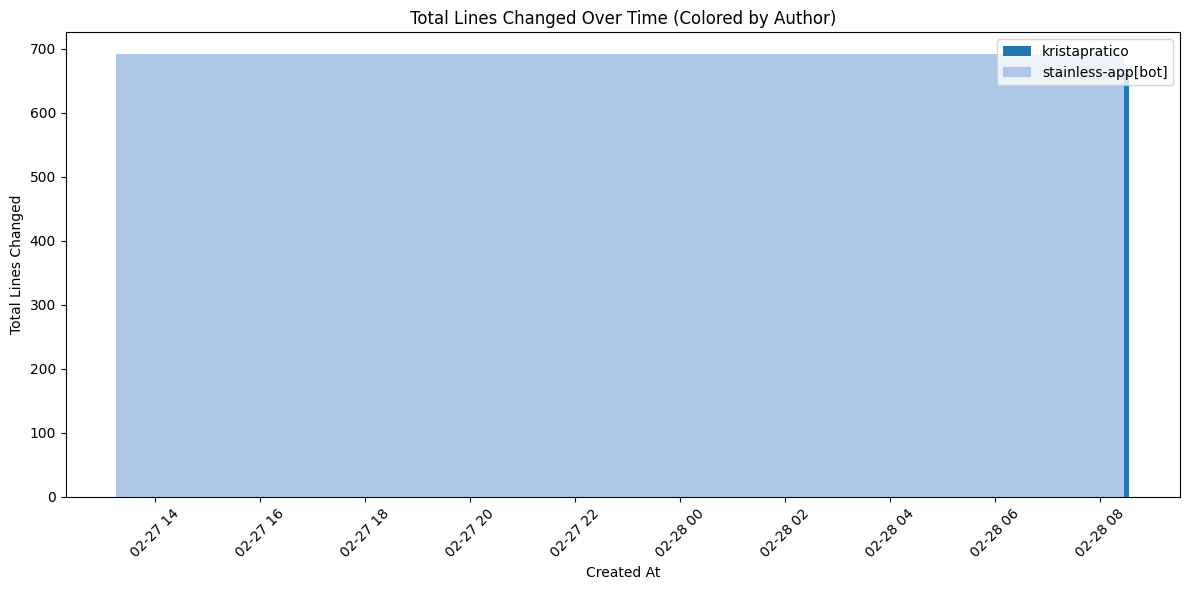

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('../output/openai-python.csv')

# created_atをdatetime型に変換
df['created_at'] = pd.to_datetime(df['created_at'])

# 著者ごとに色を割り当てるための辞書を作成
color_map = {}
unique_authors = df['authorName'].unique()
for i, author in enumerate(unique_authors):
    color_map[author] = plt.get_cmap('tab20')(i)  # tab20カラーマップを使用

# グラフの描画
fig, ax = plt.subplots(figsize=(12, 6))  # figsizeでグラフサイズを調整

for author, group in df.groupby('authorName'):
    ax.bar(group['created_at'], group['diff.totalLines'], 
           label=author, color=color_map[author], width=0.8) #widthで棒の幅を調整


# グラフのタイトルとラベルを設定
ax.set_title('Total Lines Changed Over Time (Colored by Author)')
ax.set_xlabel('Created At')
ax.set_ylabel('Total Lines Changed')

# x軸のラベルを回転させて見やすくする
plt.xticks(rotation=45)

# 凡例を表示
plt.legend()

# グラフのレイアウトを調整
plt.tight_layout()

# グラフを表示
plt.show()
